# Describing Distributions
- Clint Atterberry
- 8/31/22

## Task
In this assignment, you will be analyzing & visualizing several features in the Medical Dataset.

The features to analyze: 
- VitD_levels
- Doc_visits
- TotalCharge

For each feature listed:

1. Plot a histogram with a kde (kernel density estimate)
    1. Add a line for the mean (red)
    2. Add a line for the median (green)
    3. Add a line for for +1 std from the mean (black)
    4. Add a line for the -1 std from the mean (black)
    5. Highlight the range between +1 and -1 std (yellow)


1. Answer the following questions:
    1. Is it Discrete or Continuous?
    2. Does it have a skew? If so, which direction (+/-)
    3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)

# Setup

## Load data

In [1]:
# imports
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_context('talk')
mpl.rcParams['figure.figsize'] = [12,6]

In [2]:
# save csv to file, load df, and read first 3 lines
file = 'Data/medical_dataset.csv'
df = pd.read_csv(file)
df.head(3)     # data successfully loaded!

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.40342
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.99812
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.19246


## Explore and Clean Data

In [3]:
# exploring column names, column types, missing items, and dimensions
df.info()     # all column names are consistent
              # data types appear correct
              # there are a number of missing values across multiple columns
              # currently 1000 rows, 32 columns
              # df = 250 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

In [4]:
# drop rows with missing values in at least 1 column
df.dropna(inplace=True)

# verify there are no more missing data items
df.info()     # success!
              # df = 239 KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               930 non-null    object 
 1   Lat                 930 non-null    float64
 2   Lng                 930 non-null    float64
 3   Area                930 non-null    object 
 4   Children            930 non-null    float64
 5   Age                 930 non-null    int64  
 6   Income              930 non-null    float64
 7   Marital             930 non-null    object 
 8   Gender              930 non-null    object 
 9   ReAdmis             930 non-null    int64  
 10  VitD_levels         930 non-null    float64
 11  Doc_visits          930 non-null    int64  
 12  Full_meals_eaten    930 non-null    int64  
 13  vitD_supp           930 non-null    int64  
 14  Soft_drink          930 non-null    int64  
 15  Initial_admin       930 non-null    object 
 16  HighBloo

In [5]:
df.duplicated().sum()

0

In [6]:
# create columns to keep as col, save as med_df
col = ['VitD_levels', 'Doc_visits', 'TotalCharge']
med_df = df[col]
med_df.head()     # success!

,VitD_levels,Doc_visits,TotalCharge
0,19.141466,6,3726.702860
1,18.940352,4,4193.190458
2,18.057507,4,2434.234222
3,16.576858,4,2127.830423
5,19.612646,6,2636.691180


In [7]:
# exploring dimensions and dtypes
med_df.info()     # 930 rows, 3 columns
                  # column dtypes are correct
                  # med_df = 29.1 KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   VitD_levels  930 non-null    float64
 1   Doc_visits   930 non-null    int64  
 2   TotalCharge  930 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 29.1 KB


In [8]:
# exploring med_df for impossible values
med_df.describe()     # all values appear possible
                      # data is ready for plotting

,VitD_levels,Doc_visits,TotalCharge
count,930.000000,930.000000,930.000000
mean,17.986261,5.001075,3251.147036
std,2.073760,1.056529,603.615623
min,11.475314,2.000000,2022.650007
25%,16.579752,4.000000,2829.592364
50%,18.029580,5.000000,3178.901458
75%,19.449319,6.000000,3633.629947
max,24.565463,9.000000,5572.846022


# Plotting Histograms

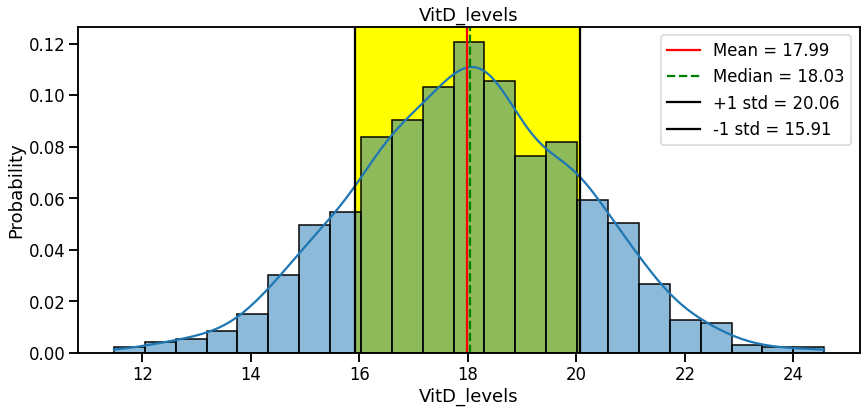

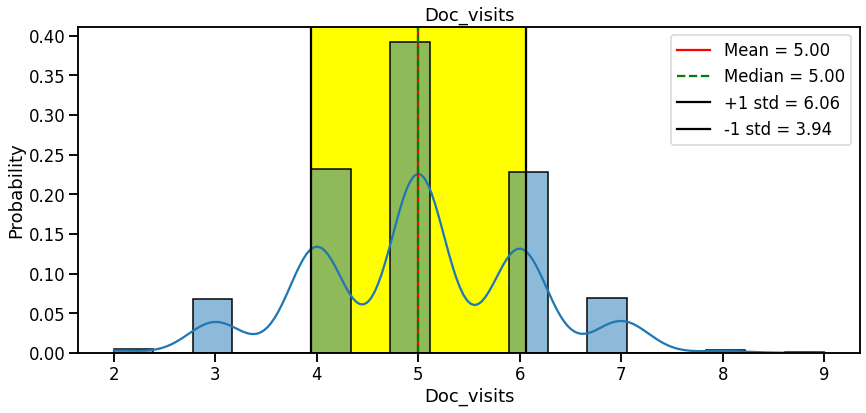

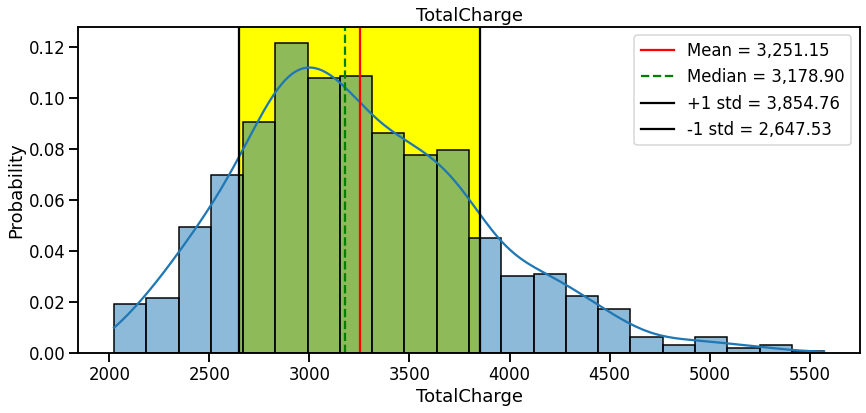

In [9]:
# itereating through the columns to do the following:
                            # plot a hist w/ kde
                            # add a line for the mean (red)
                            # add a line for the median(green)
                            # add a line for the +1 sd from the mean (black)
                            # add a line for the -1 sd from the mean (black)
                            # highlight the range between +1 and -1 sd (yellow)

for col in med_df.columns:
    feature = med_df[col]
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    plus_one_std = mean + std
    minus_one_std = mean - std
    fig,ax = plt.subplots(figsize=(14,6))
    sns.histplot(feature ,ax=ax,stat='probability', kde=True)
    ax.axvline(mean, color = 'red',label=f'Mean = {mean:,.2f}')
    ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
    ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
    ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
    ax.set_title(f'{col}')
    ax.legend();
                        # success!

# Answers

## VitD_levels
1. Is it discrete or continuous? **Continuous**

2. Does it have a skew? If so, what direction(+/-) **No**

3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic) **Mesokurtic**


## Doc_Visits
1. Is it discrete or continuous? **Discrete**

2. Does it have a skew? If so, what direction(+/-) **No**

3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic) **Leptokurtic**

## TotalCharge
1. Is it discrete or continuous? **Continuous**

2. Does it have a skew? If so, what direction(+/-) **Yes, +**

3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic) **Mesokurtic**